In [1]:
from __future__ import division
import import_ipynb
import diffraction_code
from diffraction_code import Diffraction
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anim

importing Jupyter notebook from diffraction_code.ipynb


In [2]:
## For creating GIFS in jupyter
class AnimatedGif:
    def __init__(self, size=(300, 300)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 20, size[1] / 20)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []
 
    def add(self, image, label=''):
        plt_im = plt.imshow(image,animated=True,cmap = 'hsv')
        plt_txt = plt.text(10, 310, label, color='red')
        self.images.append([plt_im, plt_txt])
 
    def save(self, filename):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=10)

In [11]:
##Gaussian Initial Condition
def gaussian(L,N,lam,z):
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    y = np.linspace(-L/2,L/2-dx,N)
    X, Y = np.meshgrid(x, y)
    w = 1e-2
    f = np.e**(-(X**2 + Y**2)/(w**2))
    return f

##Circular aperature initial condition
def circular_aperature(L,N,lam,z):
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    y = np.linspace(-L/2,L/2-dx,N)
    X, Y = np.meshgrid(x, y)
    r_0 = 1e-3
    x_0 = 0
    y_0 = 0
    z_0 = -3e-2
    A = 3e-2

    k = np.pi*2/lam
    z1 = 0

    circ = np.sqrt(X**2 + Y**2)/r_0

    for i in range(len(x)):
        for j in range(len(y)): 
            if circ[i,j] > 1:
                circ[i,j] = 0
            else: 
                circ[i,j] = 1
            
    f = A*circ*(np.e**(1j*k*np.sqrt((X-x_0)**2 + (Y-y_0)**2 + (z1-z_0)**2)))/np.sqrt((X-x_0)**2 + (Y-y_0)**2 + (z1-z_0)**2)  
    return f

MovieWriter imagemagick unavailable; using Pillow instead.


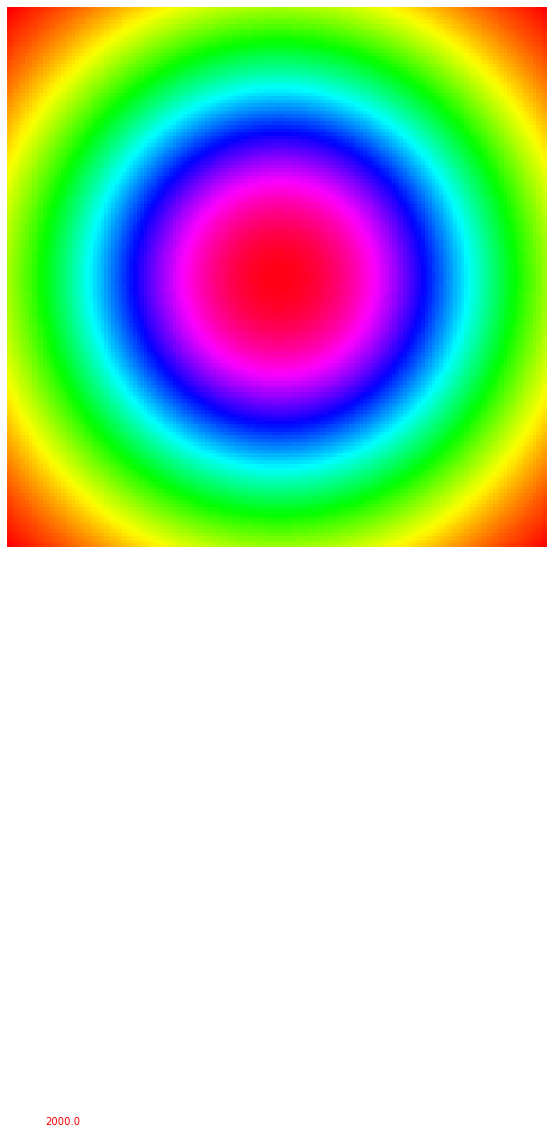

In [10]:
L = 1e-1
N = 150
lam = 1e-6

M = np.full((N, N), True, dtype=bool)
animated_gif = AnimatedGif(size=(N, N))
animated_gif.add(M, label='0')

images = []
z_step = np.linspace(100,2000,100)
for z in z_step:
    initial = gaussian(L,N,lam,z)
    solutions = Diffraction(initial,L,N,lam,z)
    M = abs(solutions.sinc_solution())**2
    # M = abs(solutions.fft_solution())**2
    animated_gif.add(M, label=str(z))
# animated_gif.save('Plots_and_Gifs/fft_gaussian.gif')
animated_gif.save('Plots_and_Gifs/Sinc_gaussian.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


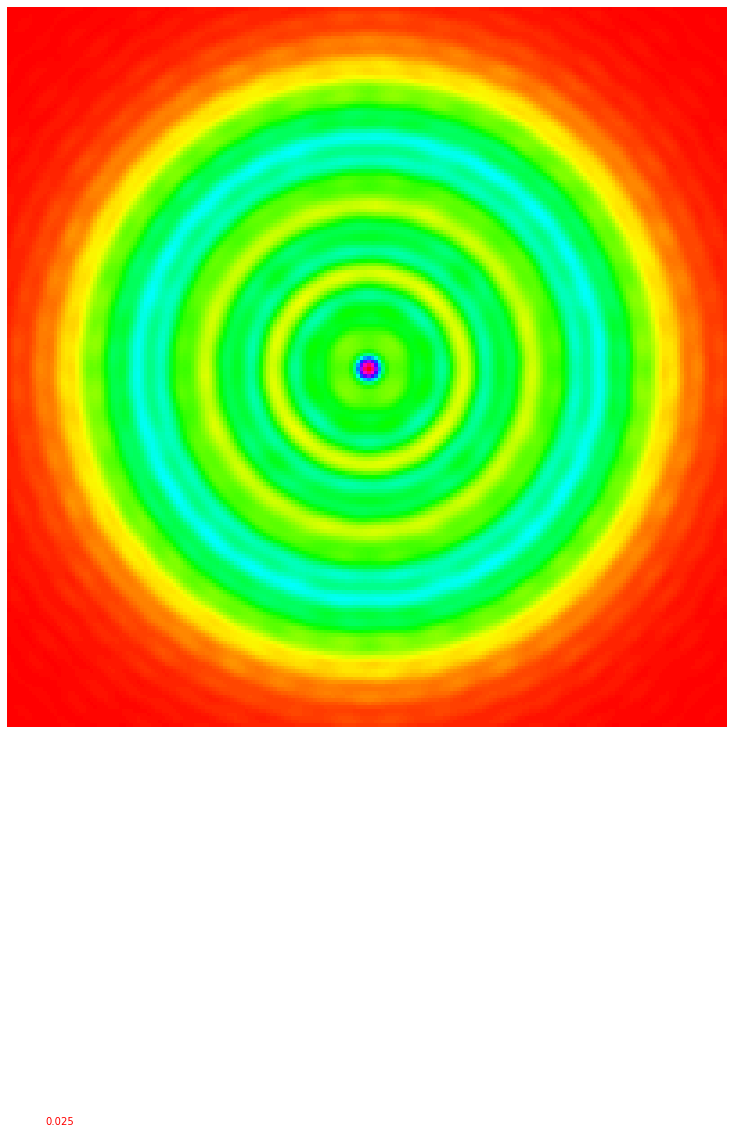